In [1]:
# Car Price Prediction Lab
#  Objective
# Learn how to improve the performance of a neural network model by using feature engineering, hyperparameter tuning, and regularization techniques. The target metric is R2 (R-Squared).

In [2]:
# Part 1: Data Exploration
# 1.1 Loading Data: Import required libraries and load the dataset.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
# 1.2 Summary Statistics and Visualization: Use summary statistics and plots to understand the data.
# Summary statistics
print(df.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

<ipython-input-4-91dd6d10a93e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f')


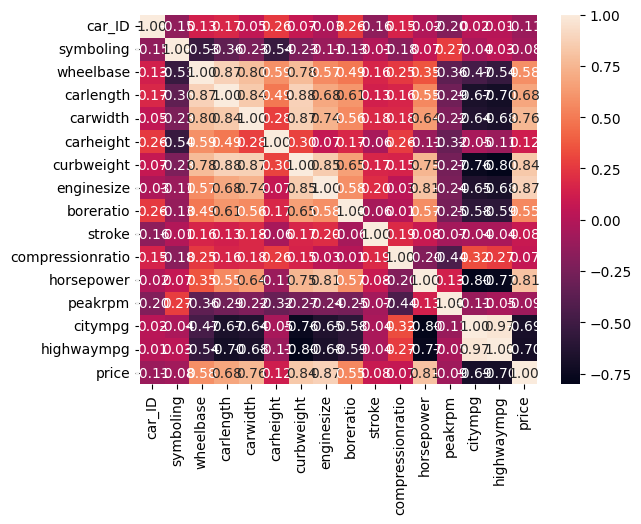

In [4]:
# Correlation heatmap
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

In [5]:
# Part 2: Data Preprocessing
# 2.1 Data Cleaning: Check for missing values.
print(df.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [6]:
# 2.2 Feature Selection: Select features that are correlated with the target variable.
selected_features = ['wheelbase', 'enginesize', 'horsepower', 'highwaympg']
X = df[selected_features]
y = df['price']

In [7]:
# 2.3 Data Transformation: Scale the features.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Part 3: Baseline Model
# 3.1 Build a Simple Model: Construct a basic neural network model.
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(1, activation='linear'))

In [9]:
# 3.2 Evaluation: Train the model and evaluate it using R2.

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, verbose=0)
y_pred = model.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))

2/2 [==============================] - 0s 12ms/step
R2 Score: -3.263628113818145


In [10]:
print(X_train.shape)
print(y_train.shape)

(164, 4)
(164,)


In [11]:
# Part 4: Improving the Model
# 4.1 Feature Engineering: Add or transform features.
selected_features = ['wheelbase', 'enginesize', 'horsepower', 'highwaympg', 'carwidth']

X = df[selected_features]
X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled.shape

(205, 5)

In [29]:
# Train test split again for the improved model objects
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [52]:
# 4.2 Hyperparameter Tuning: Experiment with learning rates, layers, and nodes.
model = Sequential()
model.add(Dense(200, input_dim=5, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

In [56]:
# 4.3 Regularization Techniques: Apply L1 or L2 regularization.
from keras.regularizers import l1, l2

model = Sequential()
model.add(Dense(200, input_dim=5, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

In [57]:
# 4.4 Re-Evaluation: Train the improved model and evaluate it.
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, verbose=0)
y_pred = model.predict(X_test)
print('Improved R2 Score:', r2_score(y_test, y_pred))

2/2 [==============================] - 0s 9ms/step
Improved R2 Score: 0.7294901348408224
